In [22]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

In [23]:
df = arff.loadarff("C:\\Users\\harsh\\Downloads\\4year.arff")
df = pd.DataFrame(df[0])
df.sample(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
203,-0.030899,1.11560,0.018711,1.047300,-65.61200,-0.08643,-0.030497,-0.10366,0.57574,-0.11564,...,-0.004348,0.267190,1.04890,-6.22610,4.8300,2.1252,250.680,1.4561,0.98269,b'0'
8185,0.140240,0.46455,0.318230,7.581300,52.62600,0.00000,0.140240,1.15260,1.45730,0.53545,...,0.083319,0.261910,0.90635,0.59328,11.0110,6.2812,12.111,30.1380,2.30070,b'0'
2608,-3.723100,11.53000,-10.530000,0.086732,-110.59000,0.00000,-3.642400,-0.91327,33.16200,-10.53000,...,-0.109830,0.353580,1.10980,0.00000,42.6950,149.1700,126.900,2.8762,NaN,b'0'
5875,-0.002995,0.72139,-0.288960,0.599440,-81.08300,-0.10629,-0.003015,0.31405,0.99494,0.22655,...,-0.005085,-0.013222,1.00510,0.00000,23.1650,5.8891,152.350,2.3958,3.04510,b'0'
661,0.011967,0.43964,0.128020,1.500900,-0.43762,0.27884,0.014575,1.27410,1.02410,0.56014,...,0.023568,0.021364,0.97643,0.32865,8.9552,4.5382,81.541,4.4763,1.85580,b'0'


In [24]:
# Rename input columns to X(n) format
input_columns = df.columns[:-1]  
renamed_input_columns = [f"X({n})" for n in range(1, len(input_columns) + 1)]
df.rename(columns=dict(zip(input_columns, renamed_input_columns)), inplace=True)

# Rename target column to 'Y'
df.rename(columns={'class': 'Y'}, inplace=True)
df.sample(5)

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
2997,-0.070954,0.64616,-0.039442,0.93802,-44.4730,0.000000,-0.070954,0.547590,2.15830,0.35384,...,-0.028028,-0.20053,1.03270,0.0,11.3160,5.8432,107.620,3.3914,5.35520,b'0'
309,0.113970,0.25629,0.182020,1.71020,10.2260,0.242860,0.143590,2.604800,1.11500,0.66757,...,0.103150,0.17072,0.89685,0.0,10.6190,5.1621,61.832,5.9031,2.69350,b'0'
3146,0.169800,0.49872,0.418950,1.84010,-9.3964,-0.000581,0.195430,1.005100,2.06120,0.50128,...,0.099720,0.33874,0.90533,0.0,4.4291,7.1008,88.316,4.1329,25.03700,b'0'
4465,0.066868,0.93922,0.287790,1.60470,29.1000,-0.036924,0.080780,0.064713,2.06670,0.06078,...,0.043354,1.10020,0.96105,0.0,3325.4000,3.9300,84.058,4.3422,8.74740,b'0'
9301,-0.095888,0.60902,-0.410710,0.19207,-252.0000,-0.285340,-0.095888,0.641980,0.57754,0.39098,...,0.087434,-0.24525,0.85781,0.0,9.0947,18.7540,321.270,1.1361,0.64001,b'1'


In [25]:
# Get the shape (no of rows & columns) in our dataset

df.shape


(9792, 65)

In [26]:
# Understanding the  Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X(1)    9791 non-null   float64
 1   X(2)    9791 non-null   float64
 2   X(3)    9791 non-null   float64
 3   X(4)    9749 non-null   float64
 4   X(5)    9771 non-null   float64
 5   X(6)    9791 non-null   float64
 6   X(7)    9791 non-null   float64
 7   X(8)    9773 non-null   float64
 8   X(9)    9792 non-null   float64
 9   X(10)   9791 non-null   float64
 10  X(11)   9791 non-null   float64
 11  X(12)   9749 non-null   float64
 12  X(13)   9771 non-null   float64
 13  X(14)   9791 non-null   float64
 14  X(15)   9784 non-null   float64
 15  X(16)   9773 non-null   float64
 16  X(17)   9773 non-null   float64
 17  X(18)   9791 non-null   float64
 18  X(19)   9771 non-null   float64
 19  X(20)   9771 non-null   float64
 20  X(21)   9634 non-null   float64
 21  X(22)   9791 non-null   float64
 22  

In [27]:
df.describe()

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(55),X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64)
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [28]:
df['Y'].value_counts()

b'0'    9277
b'1'     515
Name: Y, dtype: int64

In [29]:
df = pd.get_dummies(df,columns=['Y'],drop_first=True)

# Renaming target column again to 'Y'
df.rename(columns={"Y_b'1'": 'Y'}, inplace=True)
df

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(56),X(57),X(58),X(59),X(60),X(61),X(62),X(63),X(64),Y
0,0.159290,0.46240,0.077730,1.16830,-44.8530,0.467020,0.189480,0.82895,1.12230,0.38330,...,0.108990,0.415570,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.05600,0
1,-0.127430,0.46243,0.269170,1.75170,7.5970,0.000925,-0.127430,1.16250,1.29440,0.53757,...,-0.089372,-0.237040,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.47250,0
2,0.070488,0.23570,0.527810,3.23930,125.6800,0.163670,0.086895,2.87180,1.05740,0.67689,...,0.054286,0.104130,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.78180,0
3,0.136760,0.40538,0.315430,1.87050,19.1150,0.504970,0.136760,1.45390,1.11440,0.58938,...,0.102630,0.232030,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.64840,0
4,-0.110080,0.69793,0.188780,1.27130,-15.3440,0.000000,-0.110080,0.43282,1.73500,0.30207,...,0.439880,-0.364400,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.03600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,0.004676,0.54949,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,0.43205,...,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150,1
9788,-0.027610,0.60748,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,0.33509,...,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810,1
9789,-0.238290,0.62708,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,0.17760,...,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501,1
9790,0.097188,0.75300,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,0.24700,...,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910,1


In [30]:
# Get the no of missing data points per column

df.isnull().sum()

X(1)       1
X(2)       1
X(3)       1
X(4)      43
X(5)      21
        ... 
X(61)     32
X(62)     21
X(63)     43
X(64)    231
Y          0
Length: 65, dtype: int64

In [31]:
# Get the percentage of missing data points per column

df.isnull().mean()*100

X(1)     0.010212
X(2)     0.010212
X(3)     0.010212
X(4)     0.439134
X(5)     0.214461
           ...   
X(61)    0.326797
X(62)    0.214461
X(63)    0.439134
X(64)    2.359069
Y        0.000000
Length: 65, dtype: float64

In [32]:
# Percentage of data that is missing

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')


Percentage of data that is missing in entire dataset : 1.3788335847159376 % .


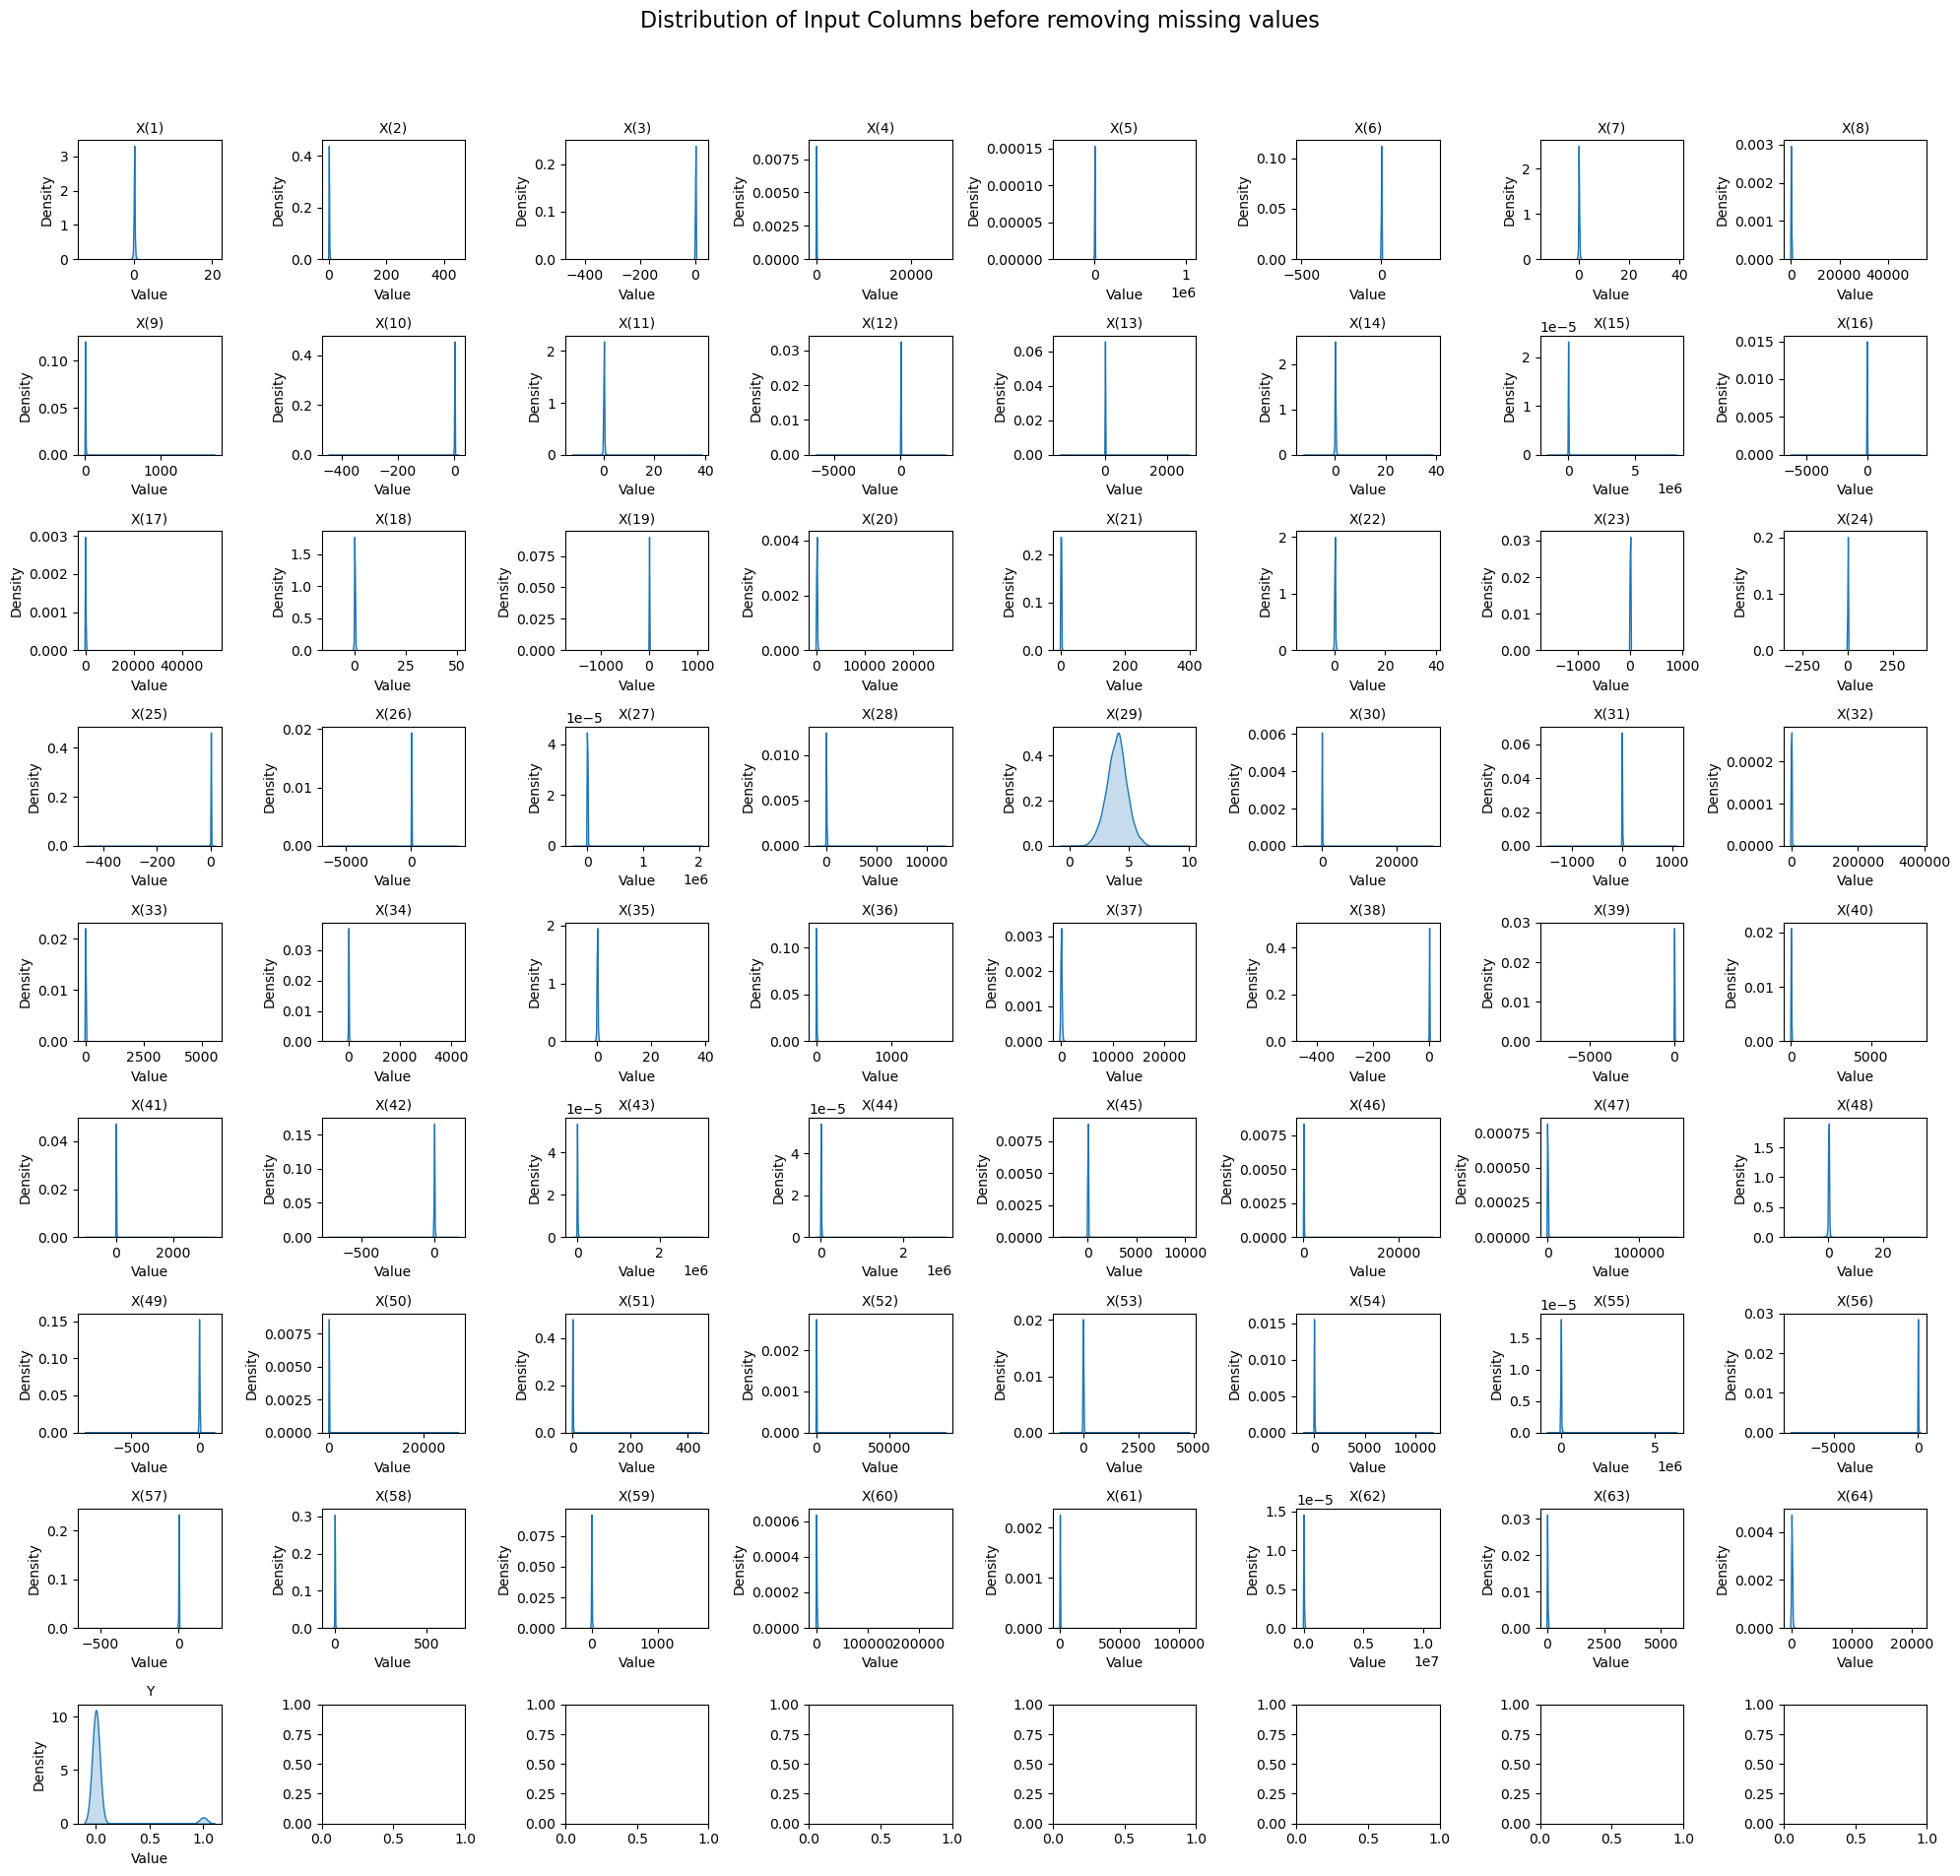

In [33]:

# Calculate the number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  
# Create subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns before removing missing values', fontsize=16)

# Iterate through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [34]:
import pandas as pd
from sklearn.impute import SimpleImputer

def fill_missing_values(dataset):
    Y = None 
    if Y in dataset.columns:
        target = dataset[Y]
        features = dataset.drop(columns=[Y])
    else:
        features = dataset
    
    # Initialize the imputer with mean
    imputer = SimpleImputer(strategy='median')
    
    # Fit and transform the features using the imputer
    filled_features = imputer.fit_transform(features)
    
    # Convert the filled features back to a DataFrame
    filled_features_df = pd.DataFrame(filled_features, columns=features.columns)
    
    # Concatenate target variable back
    if Y in dataset.columns:
        filled_features_df[Y] = target
    
    return filled_features_df

df = fill_missing_values(df)
# Checking again just to make sure that whether data contain missing values or not.

total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print('Percentage of data that is missing in entire dataset :', percent_missing, '% .')

Percentage of data that is missing in entire dataset : 0.0 % .


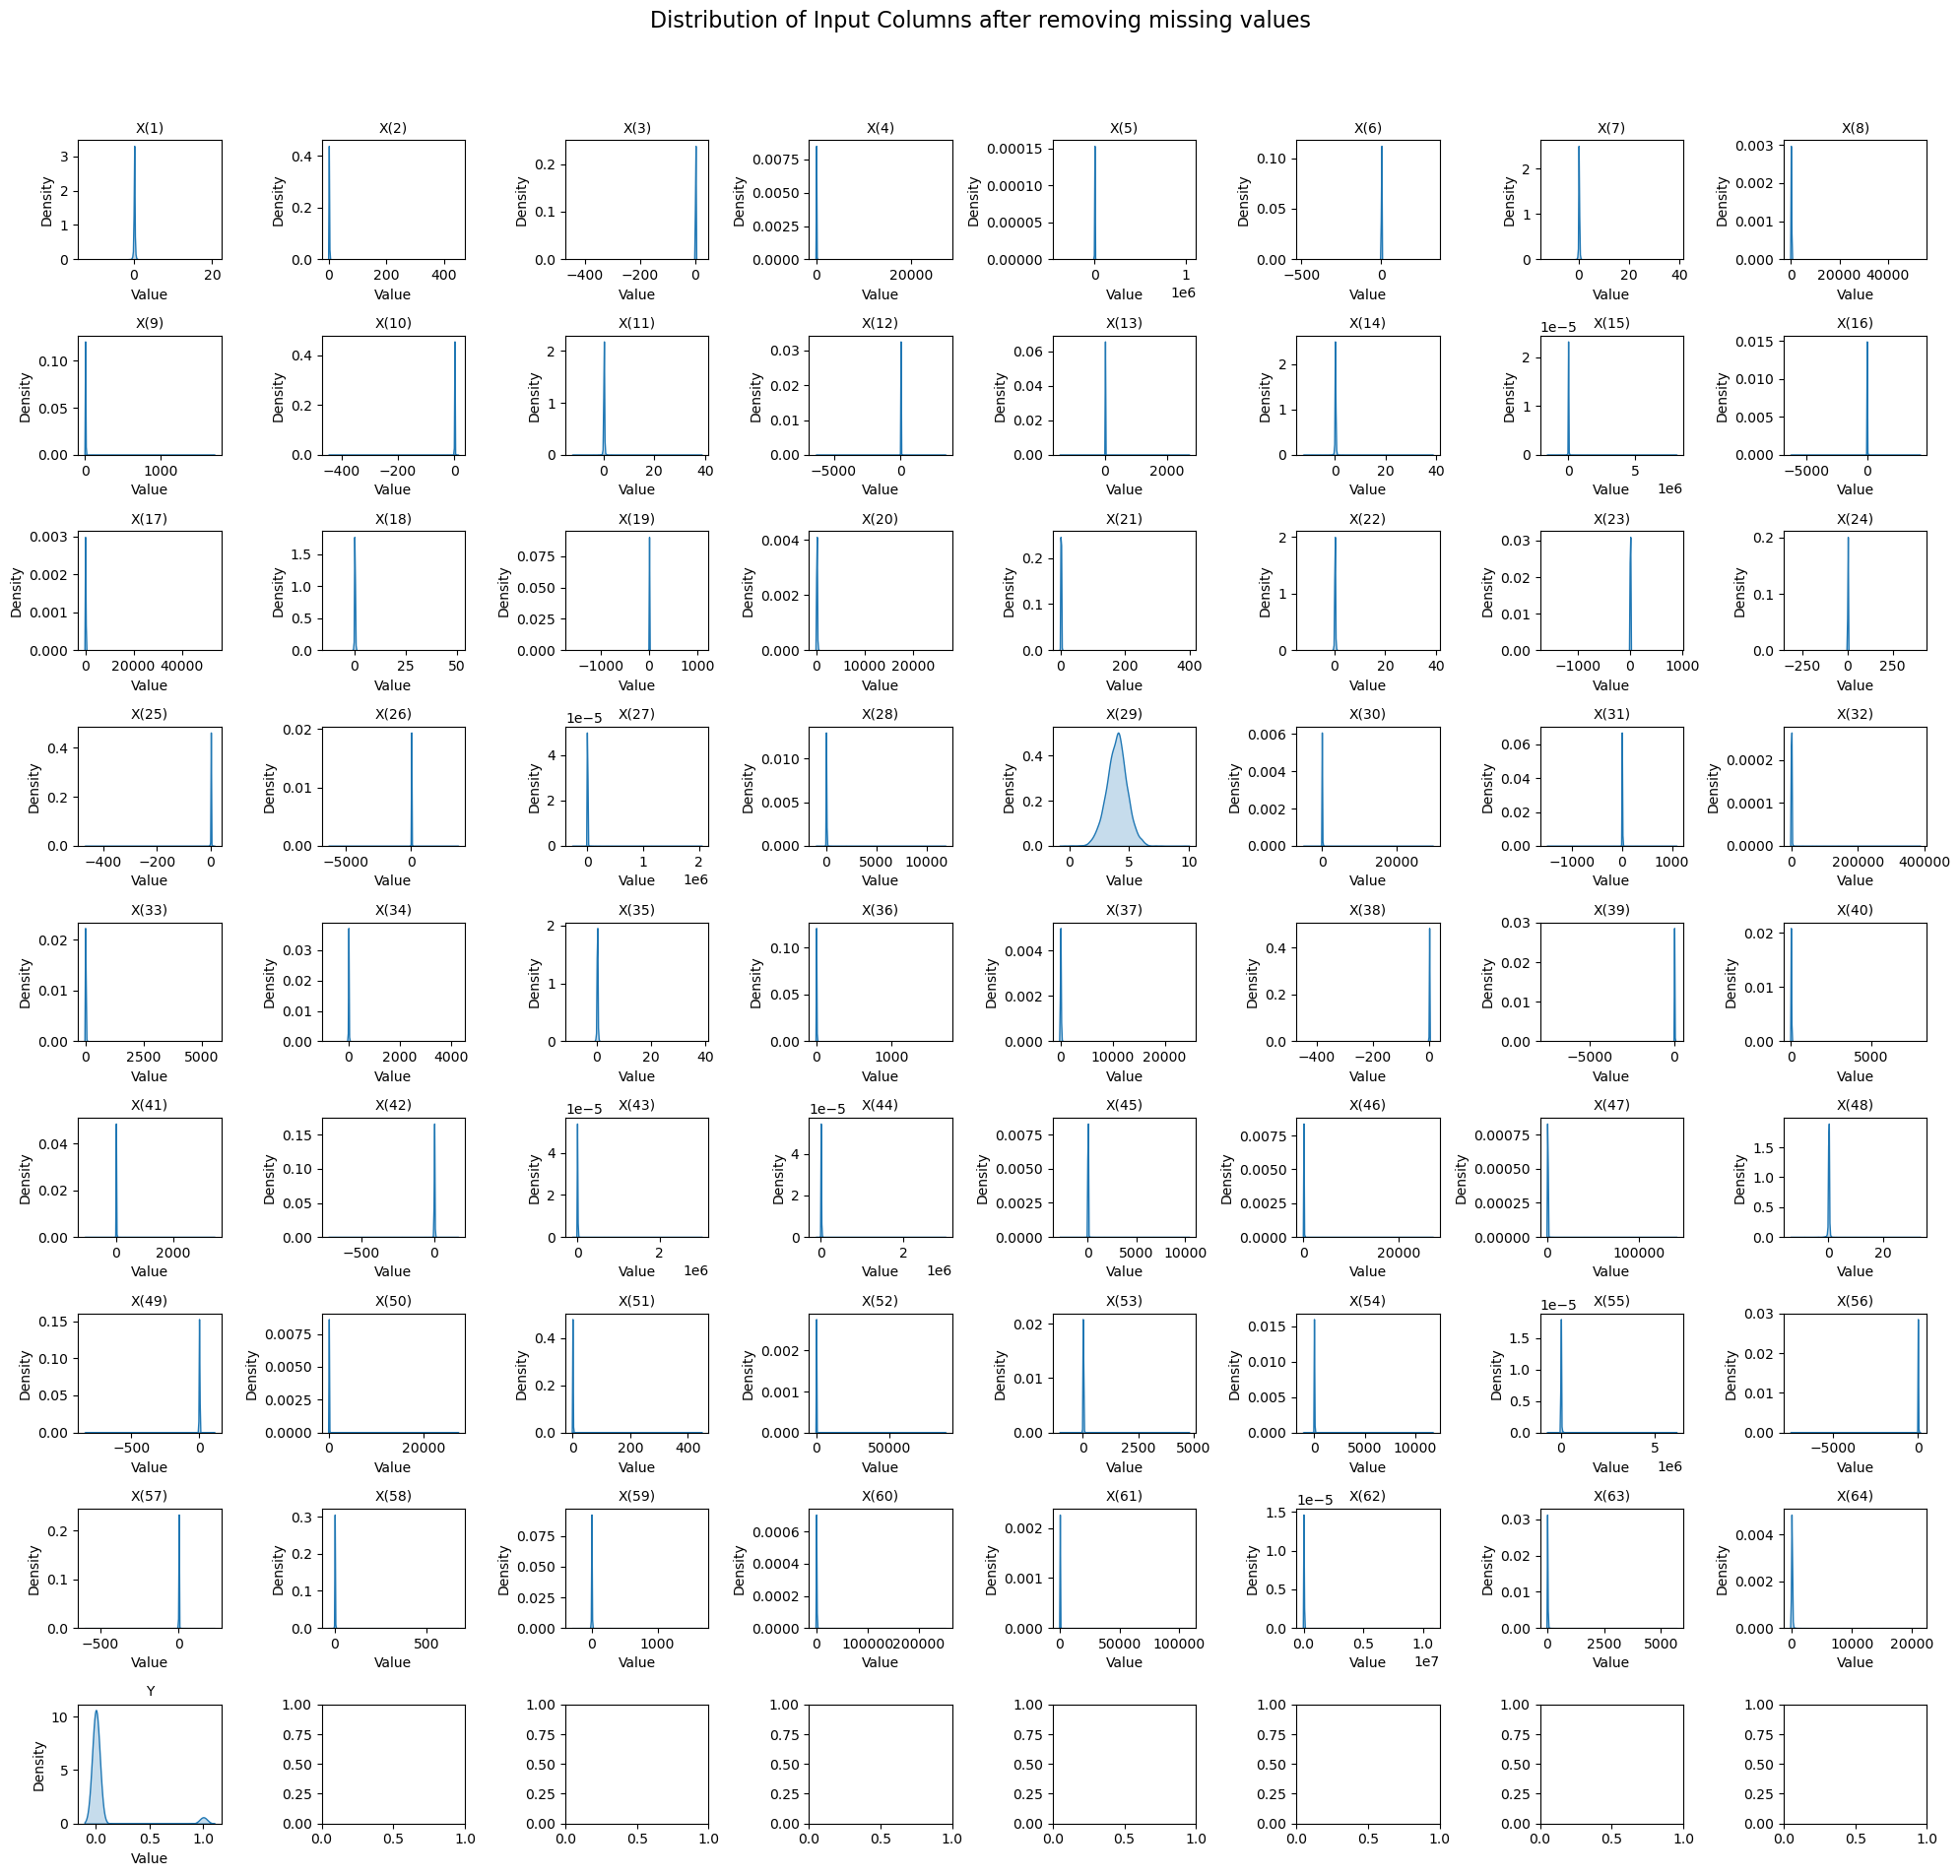

In [35]:
# Calculate the number of rows and columns for the subplot grid
num_cols = 8
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols 

# Create subplots to display density plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Distribution of Input Columns after removing missing values', fontsize=16)

# Iterate through each column and create density plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot density plot for the column
    sns.kdeplot(data=df[column], ax=ax, fill=True)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

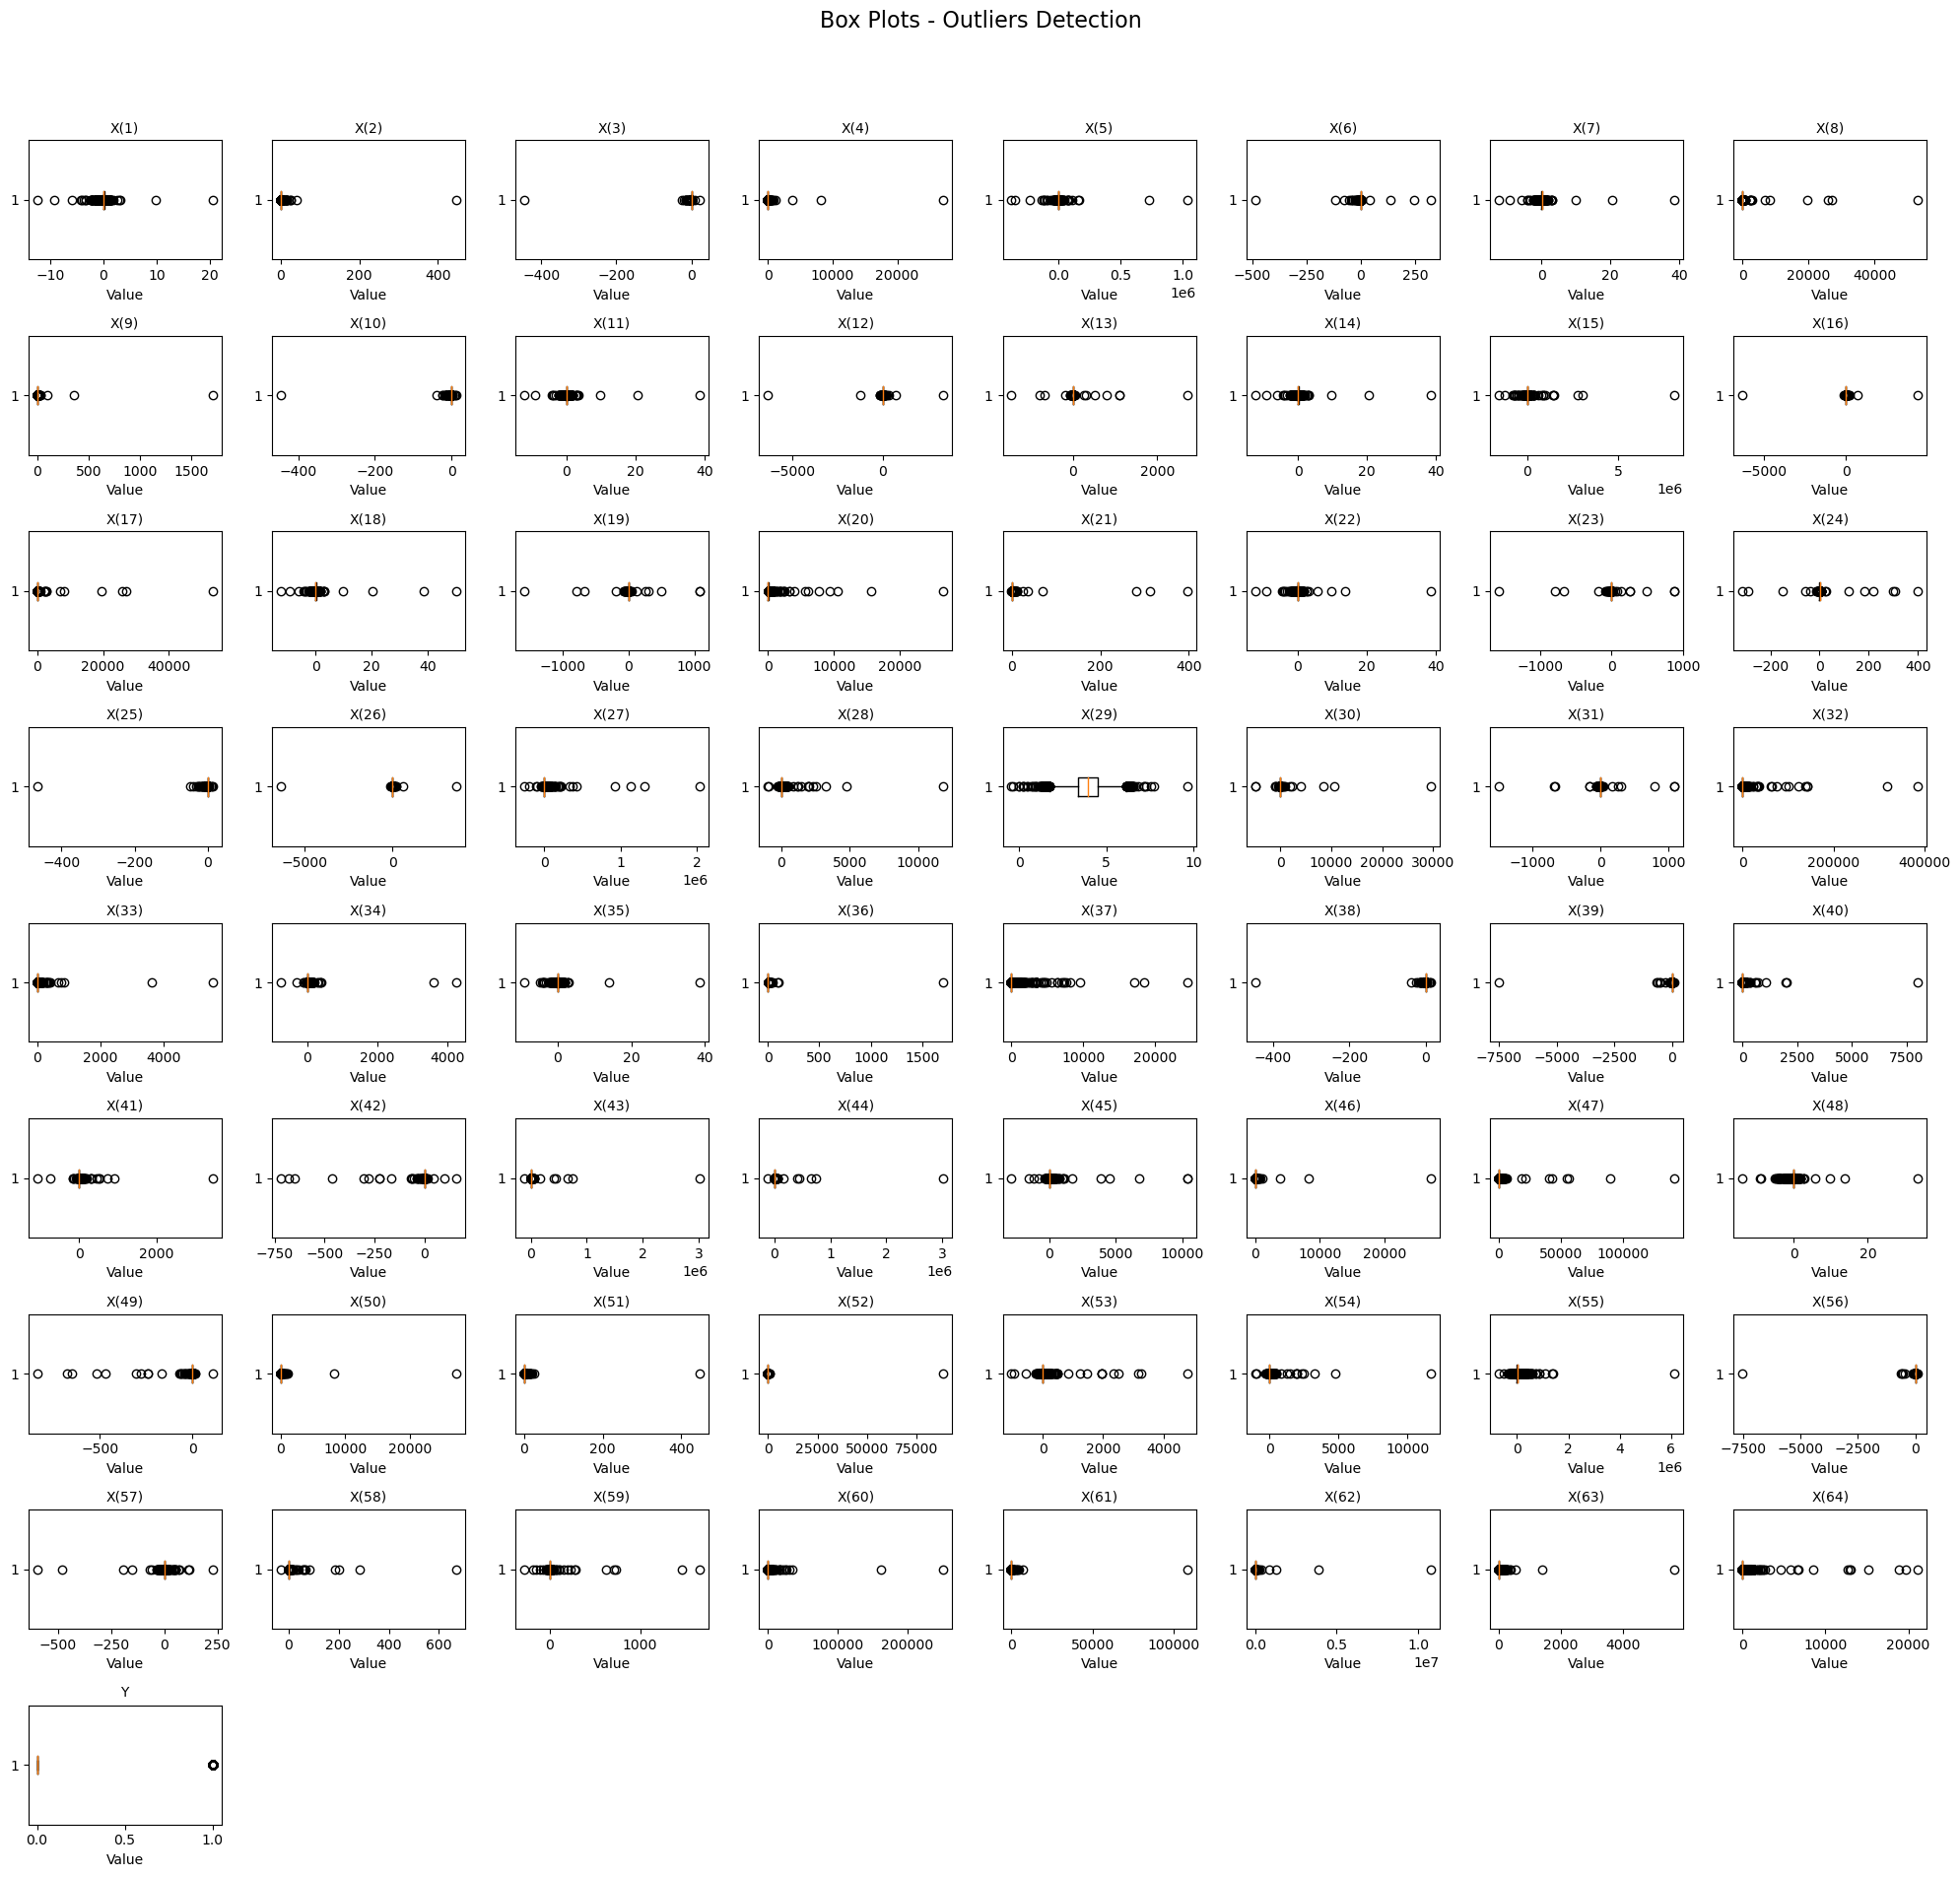

In [36]:
# Creating subplots to display box plots
num_cols =  8  
num_features = len(df.columns)
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to ensure all features are included

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Box Plots - Outliers Detection', fontsize=16)

# Iterating through each column and create box plots
for i, column in enumerate(df.columns):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    
    # Plot box plot for the column
    ax.boxplot(df[column], vert=False)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('Value')
    
# Hiding empty subplots
for i in range(num_features, num_cols * num_rows):
    row_num = i // num_cols
    col_num = i % num_cols
    axes[row_num, col_num].axis('off')

# Adjusting layout and spacing of subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [38]:
target_column = 'Y'  
target = df[target_column]
features = df.drop(columns=[target_column])

# Applying the Yeo-Johnson transformation (because the nature of data is positively as well as negatively skewed.)
transformer = PowerTransformer(method='yeo-johnson')
transformed_features = transformer.fit_transform(features)

# Converting the transformed features back to a DataFrame
transformed_features_df = pd.DataFrame(transformed_features, columns=features.columns)
df = pd.concat([transformed_features_df, target], axis=1)